# **Object Segmentation Bathroom**

**Performance Plot**

In [ ]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input, Add

# Time
import time
import datetime

In [ ]:
# Visualització dels resultats de l'entrenament
def plot_training_history(history):
    # Extreure mètriques
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Crear gràfic de precisió
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Fixar l'interval de y
    plt.legend()

    # Crear gràfic de pèrdua
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 1)  # Fixar l'interval de y
    plt.legend()


## YOLOv8

Install YOLOv8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Model

In [ ]:
# large

model = YOLO("yolov8l-seg.pt")  # load a pretrained model (recommended for training)

100%|██████████| 88.1M/88.1M [00:00<00:00, 457MB/s]


Train

In [ ]:
results = model.train(data="/content/drive/MyDrive/TFG/bathroom-obj-seg/data.yaml", epochs=50, project="/content/drive/MyDrive/yolo-bathroom-obj-seg/training-results/", name="train01", plots=True)

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/drive/MyDrive/yolo-bathroom-obj-seg/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolo-bathroom-obj-seg/training-results/, name=train01, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

100%|██████████| 755k/755k [00:00<00:00, 43.9MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 150MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/yolo-bathroom-obj-seg/train/labels.cache... 174 images, 0 backgrounds, 0 corrupt: 100%|██████████| 174/174 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/yolo-bathroom-obj-seg/train/images/Captura-de-pantalla-2024-04-24-205530-copia_png_jpg.rf.85c1ccdb506d7f8688f607f986785e6b.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/yolo-bathroom-obj-seg/valid/labels.cache... 74 images, 0 backgrounds, 0 corrupt: 100%|██████████| 74/74 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolo-bathroom-obj-seg/training-results/train01/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo-bathroom-obj-seg/training-results/train01
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      12.1G      1.439       3.98      3.358      1.657        183        640: 100%|██████████| 11/11 [00:22<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

                   all         74        379      0.204      0.364      0.183      0.116      0.192      0.326       0.17      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.9G      0.987      2.579      1.998      1.358        167        640: 100%|██████████| 11/11 [00:14<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         74        379      0.401      0.465      0.351      0.251      0.396      0.444      0.347      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50        12G     0.9925      2.234      1.827      1.348        153        640: 100%|██████████| 11/11 [00:13<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]

                   all         74        379      0.337      0.471      0.342      0.227      0.368      0.466      0.333      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.2G      1.049       2.23      1.685      1.351        150        640: 100%|██████████| 11/11 [00:12<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all         74        379      0.516      0.393      0.306      0.194      0.225      0.491      0.257      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      12.1G      1.057      2.357       1.71      1.378        135        640: 100%|██████████| 11/11 [00:11<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

                   all         74        379      0.301      0.529      0.352      0.214      0.477      0.302      0.309      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.9G       1.05      2.292      1.725      1.394        162        640: 100%|██████████| 11/11 [00:11<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all         74        379       0.24       0.38      0.216       0.13      0.183      0.239      0.129     0.0746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.9G      1.048      2.289      1.731      1.371        154        640: 100%|██████████| 11/11 [00:11<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all         74        379      0.292      0.343      0.256      0.142      0.261       0.26        0.2       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50        12G      1.088      2.302      1.677      1.423        126        640: 100%|██████████| 11/11 [00:11<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all         74        379      0.208      0.294       0.16     0.0891      0.188      0.229      0.127     0.0684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.8G      1.089      2.268      1.626      1.421        155        640: 100%|██████████| 11/11 [00:11<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all         74        379      0.186      0.406      0.203      0.108      0.128      0.312       0.16     0.0768



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50        12G      1.063      2.246      1.559      1.378        128        640: 100%|██████████| 11/11 [00:11<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all         74        379       0.31      0.396      0.274      0.152      0.269      0.292      0.215      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      12.1G      1.045      2.189      1.533      1.378        146        640: 100%|██████████| 11/11 [00:12<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         74        379      0.316      0.425      0.328      0.184      0.279      0.424      0.315       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.1G       1.05       2.11      1.494       1.38        155        640: 100%|██████████| 11/11 [00:13<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.52it/s]

                   all         74        379      0.281      0.317      0.256      0.136      0.257      0.277       0.23      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.9G     0.9858      2.077      1.459      1.351        137        640: 100%|██████████| 11/11 [00:12<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]

                   all         74        379      0.427      0.419      0.393      0.226      0.373      0.404      0.355      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      12.1G     0.9707      2.086       1.42      1.334        171        640: 100%|██████████| 11/11 [00:12<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

                   all         74        379      0.399      0.509      0.387       0.22      0.376      0.446      0.338      0.191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      12.1G      0.914      1.847      1.292      1.286        125        640: 100%|██████████| 11/11 [00:11<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]

                   all         74        379       0.47      0.522      0.464      0.302      0.469      0.451      0.423      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50        12G     0.9012      1.886      1.305      1.278        152        640: 100%|██████████| 11/11 [00:12<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]

                   all         74        379       0.52      0.435      0.448      0.285      0.561      0.383      0.399      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.9G      0.912      1.887      1.304      1.284        178        640: 100%|██████████| 11/11 [00:11<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all         74        379      0.495      0.521      0.486       0.32       0.46      0.492      0.447      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50        12G      0.892      1.759      1.233      1.261        167        640: 100%|██████████| 11/11 [00:11<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

                   all         74        379      0.539      0.511      0.462      0.306      0.516       0.48      0.441      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50        12G      0.869      1.672      1.242      1.256        137        640: 100%|██████████| 11/11 [00:11<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all         74        379      0.497      0.477       0.45      0.277      0.442      0.464      0.403      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50        12G     0.8819       1.71       1.23      1.276        156        640: 100%|██████████| 11/11 [00:11<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]

                   all         74        379      0.425      0.537      0.435      0.276       0.44      0.524      0.427      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.8G     0.8164      1.635      1.184      1.235        138        640: 100%|██████████| 11/11 [00:11<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all         74        379      0.498      0.458      0.477      0.315      0.513      0.469      0.463      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.1G     0.8143      1.766      1.159      1.213        163        640: 100%|██████████| 11/11 [00:11<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]

                   all         74        379      0.506      0.528      0.471      0.316      0.541      0.533      0.472      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50        12G     0.8022      1.622      1.128      1.203        140        640: 100%|██████████| 11/11 [00:11<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]

                   all         74        379      0.542      0.533      0.503      0.334      0.547      0.518      0.495      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50        12G     0.7559      1.481      1.034      1.181        145        640: 100%|██████████| 11/11 [00:11<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]

                   all         74        379       0.56      0.555      0.523      0.354      0.652      0.501      0.524      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.9G     0.7727      1.578      1.059      1.195        148        640: 100%|██████████| 11/11 [00:11<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]

                   all         74        379      0.532      0.606       0.55      0.365      0.576      0.584      0.537      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.1G     0.7427      1.463     0.9979      1.151        156        640: 100%|██████████| 11/11 [00:13<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all         74        379      0.537      0.595      0.548       0.35      0.545      0.593      0.537      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50        12G     0.7404      1.493      1.019      1.157        154        640: 100%|██████████| 11/11 [00:12<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.05s/it]

                   all         74        379      0.547      0.576      0.549      0.356      0.516      0.607      0.521       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50        12G     0.7162      1.456     0.9659      1.161        158        640: 100%|██████████| 11/11 [00:12<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]

                   all         74        379       0.61      0.539      0.544      0.337        0.6      0.532      0.526      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.9G     0.6977      1.384     0.9236      1.128        146        640: 100%|██████████| 11/11 [00:11<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all         74        379      0.602      0.552      0.557      0.359      0.549      0.575       0.52      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50        12G     0.6833      1.377     0.9311      1.116        141        640: 100%|██████████| 11/11 [00:11<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all         74        379      0.694      0.523      0.573      0.379      0.666      0.508      0.522      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      12.1G     0.6495      1.359     0.8755      1.112        151        640: 100%|██████████| 11/11 [00:11<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

                   all         74        379      0.587       0.54       0.55      0.377      0.594      0.543       0.53      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50        12G     0.6655      1.319     0.8756      1.113        165        640: 100%|██████████| 11/11 [00:11<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all         74        379      0.554      0.569      0.548      0.381      0.509       0.58      0.511       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.9G     0.6645      1.281     0.8597      1.123        130        640: 100%|██████████| 11/11 [00:11<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all         74        379       0.55      0.596      0.558      0.389      0.559      0.606      0.555      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.1G     0.6533      1.282     0.8986      1.118        139        640: 100%|██████████| 11/11 [00:12<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         74        379      0.565      0.622      0.576      0.406      0.614      0.603      0.585      0.388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.9G     0.6373      1.136     0.8261      1.096        116        640: 100%|██████████| 11/11 [00:13<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.29it/s]

                   all         74        379      0.669      0.585      0.601      0.424       0.68      0.588      0.599      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.1G     0.6372      1.221     0.8026      1.096        162        640: 100%|██████████| 11/11 [00:12<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]

                   all         74        379      0.622      0.624      0.612      0.422      0.608      0.626      0.597      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.9G     0.6023      1.163     0.7609      1.061        166        640: 100%|██████████| 11/11 [00:12<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all         74        379      0.649      0.595      0.611      0.433      0.677      0.592       0.61      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.9G     0.5846      1.141     0.7501      1.062        155        640: 100%|██████████| 11/11 [00:12<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

                   all         74        379      0.663      0.596      0.606      0.428      0.675      0.594      0.593       0.41



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50        12G     0.5555      1.065     0.7229       1.04        133        640: 100%|██████████| 11/11 [00:11<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all         74        379      0.672      0.619      0.625      0.436       0.68      0.622      0.618       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50        12G      0.599      1.168     0.7476      1.069        148        640: 100%|██████████| 11/11 [00:11<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]

                   all         74        379       0.65      0.648      0.631      0.454      0.647      0.634      0.617      0.418


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.6G     0.5393     0.9968     0.7307      1.032         69        640: 100%|██████████| 11/11 [00:18<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]

                   all         74        379        0.7      0.598       0.62      0.452      0.687        0.6      0.604       0.41



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.7G     0.5621      1.076     0.7221      1.058         72        640: 100%|██████████| 11/11 [00:12<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         74        379       0.69      0.582      0.623      0.453      0.679      0.572        0.6      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.7G     0.5004     0.9505     0.6436      1.023         52        640: 100%|██████████| 11/11 [00:12<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]

                   all         74        379      0.712      0.629      0.646      0.463      0.689      0.611       0.62      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.8G     0.4871     0.9071     0.5834       1.02         64        640: 100%|██████████| 11/11 [00:11<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all         74        379       0.72      0.603      0.627      0.448      0.706      0.584      0.598      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.6G     0.4734     0.8616     0.5711     0.9797         71        640: 100%|██████████| 11/11 [00:11<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all         74        379      0.712       0.62      0.634      0.451      0.699      0.607      0.607      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.8G      0.452     0.8432     0.5324     0.9706         73        640: 100%|██████████| 11/11 [00:12<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         74        379      0.698      0.631      0.633      0.451      0.685      0.615      0.614      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.8G     0.4417      0.826      0.516      0.965         78        640: 100%|██████████| 11/11 [00:12<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all         74        379      0.696      0.624      0.631      0.454      0.705      0.598      0.624      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.8G     0.4204     0.7863     0.4745      0.953         73        640: 100%|██████████| 11/11 [00:11<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all         74        379      0.719      0.625      0.636      0.458      0.711      0.613      0.626      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.6G     0.4294     0.8441     0.4839     0.9535         63        640: 100%|██████████| 11/11 [00:12<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]

                   all         74        379      0.738       0.61       0.64      0.457       0.74      0.601      0.629      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.8G     0.4219     0.7539     0.4686     0.9573         63        640: 100%|██████████| 11/11 [00:11<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all         74        379      0.733      0.623      0.647      0.467      0.718      0.611      0.634      0.439



50 epochs completed in 0.286 hours.
Optimizer stripped from /content/drive/MyDrive/yolo-bathroom-obj-seg/training-results/train01/weights/last.pt, 92.3MB
Optimizer stripped from /content/drive/MyDrive/yolo-bathroom-obj-seg/training-results/train01/weights/best.pt, 92.3MB

Validating /content/drive/MyDrive/yolo-bathroom-obj-seg/training-results/train01/weights/best.pt...
Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45915743 parameters, 0 gradients, 220.1 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]


                   all         74        379      0.733      0.623      0.647      0.467      0.717      0.611      0.633      0.438
               cabinet         74         40      0.857       0.75      0.773      0.527      0.829      0.725       0.75      0.541
                 floor         74         54      0.852      0.638      0.719      0.591      0.852      0.638      0.718      0.606
                shower         74         60      0.676      0.487       0.51      0.351      0.607      0.437      0.455      0.237
                  sink         74         97      0.725      0.652       0.71      0.519      0.759      0.683      0.732      0.528
                 tiles         74        128      0.556      0.586       0.52      0.347      0.539       0.57      0.512      0.279
Speed: 0.2ms preprocess, 18.6ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to /content/drive/MyDrive/yolo-bathroom-obj-seg/training-results/train01


**Preprocessament de dades**

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split

# Llegir el CSV amb les anotacions
csv_path = '/content/drive/MyDrive/TFG/bathroom-obj-seg/train-dataset/_annotations.csv'
annotations = pd.read_csv(csv_path)

# Funció per carregar les imatges
def load_images(images_path, size=(256, 256)):
    images = []
    for img_file in sorted(os.listdir(images_path)):
        img = load_img(os.path.join(images_path, img_file), color_mode='grayscale', target_size=size)
        img = img_to_array(img) / 255.0  # Normalitzar
        images.append(img)
    return np.array(images)

# Funció per convertir les etiquetes del CSV en màscares
def load_masks_from_csv(annotations, images_path, size=(256, 256)):
    masks = []
    for img_file in sorted(os.listdir(images_path)):
        mask = np.zeros(size, dtype=np.uint8)
        img_annotations = annotations[annotations['filename'] == img_file]
        for _, row in img_annotations.iterrows():
            xmin = int(row['xmin'] * size[1] / row['width'])
            ymin = int(row['ymin'] * size[0] / row['height'])
            xmax = int(row['xmax'] * size[1] / row['width'])
            ymax = int(row['ymax'] * size[0] / row['height'])
            mask[ymin:ymax, xmin:xmax] = 1
        masks.append(mask)
    return np.expand_dims(np.array(masks), -1)

# Definir el camí de les imatges
IMATGES_PATH = '/content/drive/MyDrive/TFG/bathroom-obj-seg/train-dataset/images/'

# Càrrega de les imatges i les màscares des del CSV
images = load_images(IMATGES_PATH)
masks = load_masks_from_csv(annotations, IMATGES_PATH)

# Divisió de les dades en conjunt d'entrenament i validació
x_train, x_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

# Definir una classe per fer la càrrega de les dades en lots
class DataGenerator(Sequence):
    def __init__(self, images, masks, batch_size=8):
        self.images = images
        self.masks = masks
        self.batch_size = batch_size
        self.indices = np.arange(len(images))

    def __len__(self):
        return len(self.images) // self.batch_size

    def __getitem__(self, index):
        indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        batch_images = self.images[indices]
        batch_masks = self.masks[indices]
        return batch_images, batch_masks

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

# Crear generadors de dades
train_gen = DataGenerator(x_train, y_train)
val_gen = DataGenerator(x_val, y_val)

# U-Net

**Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    up6 = layers.Conv2D(512, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = layers.concatenate([drop4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)
    conv9 = layers.Conv2D(2, 3, activation='relu', padding='same')(conv9)
    conv10 = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = models.Model(inputs=inputs, outputs=conv10)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

u_net = unet()
u_net.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

**Train**

In [ ]:
 # Entrenament del model

print(f'Training the model U-Net')
with tf.device('/GPU:0'):
    history = u_net.fit(train_gen, validation_data=val_gen, epochs=50)

    # Save the model manually
    model_path = f'/content/drive/MyDrive/TFG/bathroom-obj-seg/models/u-net_plain.h5'
    u_net.save(model_path)

    # Store the history and model path in the dictionary
    history_u_net = [history, model_path]


Training the model U-Net
Epoch 1/50
24/24 [==============================] - 59s 735ms/step - loss: 0.6386 - accuracy: 0.6917 - val_loss: 0.6286 - val_accuracy: 0.6989
Epoch 2/50
24/24 [==============================] - 17s 709ms/step - loss: 0.8148 - accuracy: 0.7079 - val_loss: 0.6329 - val_accuracy: 0.7052
Epoch 3/50
24/24 [==============================] - 17s 688ms/step - loss: 0.6196 - accuracy: 0.7025 - val_loss: 0.6225 - val_accuracy: 0.7047
Epoch 4/50
24/24 [==============================] - 16s 689ms/step - loss: 0.6137 - accuracy: 0.7044 - val_loss: 0.6065 - val_accuracy: 0.7088
Epoch 5/50
24/24 [==============================] - 17s 690ms/step - loss: 0.6018 - accuracy: 0.7111 - val_loss: 0.6114 - val_accuracy: 0.7017
Epoch 6/50
24/24 [==============================] - 17s 694ms/step - loss: 0.6032 - accuracy: 0.7090 - val_loss: 0.6080 - val_accuracy: 0.7081
Epoch 7/50
24/24 [==============================] - 17s 689ms/step - loss: 0.6102 - accuracy: 0.7037 - val_loss: 0.60

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


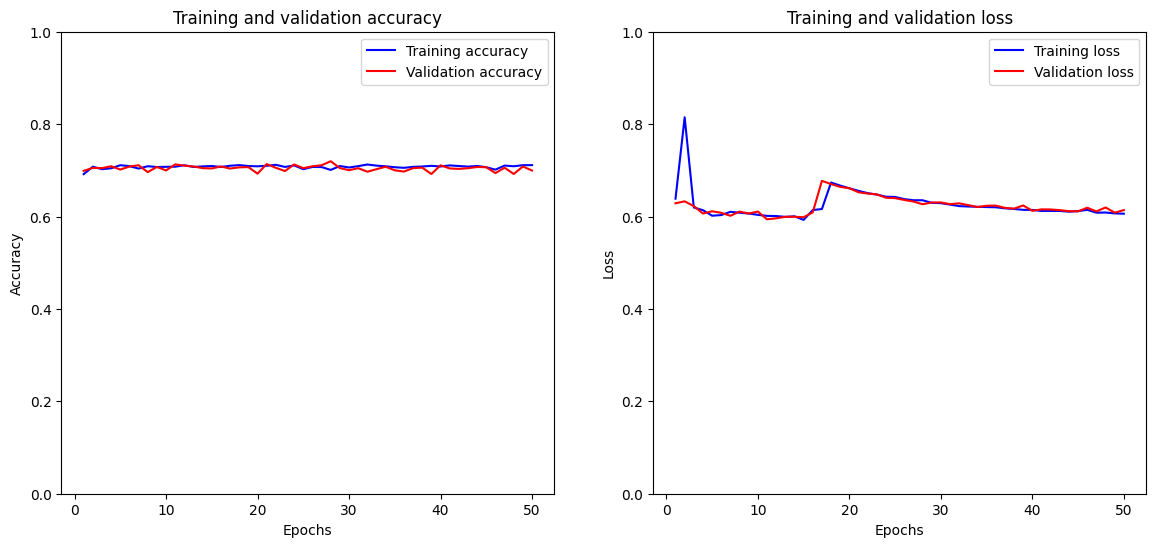

In [ ]:
plot_training_history(history_u_net[0])

# Seg-Net

**Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def segnet(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)
    conv1 = layers.Conv2D(64, 3, padding='same', activation='relu')(inputs)
    conv1 = layers.Conv2D(64, 3, padding='same', activation='relu')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, padding='same', activation='relu')(pool1)
    conv2 = layers.Conv2D(128, 3, padding='same', activation='relu')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, padding='same', activation='relu')(pool2)
    conv3 = layers.Conv2D(256, 3, padding='same', activation='relu')(conv3)
    conv3 = layers.Conv2D(256, 3, padding='same', activation='relu')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, padding='same', activation='relu')(pool3)
    conv4 = layers.Conv2D(512, 3, padding='same', activation='relu')(conv4)
    conv4 = layers.Conv2D(512, 3, padding='same', activation='relu')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = layers.Conv2D(512, 3, padding='same', activation='relu')(pool4)
    conv5 = layers.Conv2D(512, 3, padding='same', activation='relu')(conv5)
    conv5 = layers.Conv2D(512, 3, padding='same', activation='relu')(conv5)
    pool5 = layers.MaxPooling2D(pool_size=(2, 2))(conv5)

    up6 = layers.UpSampling2D(size=(2, 2))(pool5)
    conv6 = layers.Conv2D(512, 3, padding='same', activation='relu')(up6)
    conv6 = layers.Conv2D(512, 3, padding='same', activation='relu')(conv6)
    conv6 = layers.Conv2D(512, 3, padding='same', activation='relu')(conv6)

    up7 = layers.UpSampling2D(size=(2, 2))(conv6)
    conv7 = layers.Conv2D(512, 3, padding='same', activation='relu')(up7)
    conv7 = layers.Conv2D(512, 3, padding='same', activation='relu')(conv7)
    conv7 = layers.Conv2D(256, 3, padding='same', activation='relu')(conv7)

    up8 = layers.UpSampling2D(size=(2, 2))(conv7)
    conv8 = layers.Conv2D(256, 3, padding='same', activation='relu')(up8)
    conv8 = layers.Conv2D(256, 3, padding='same', activation='relu')(conv8)
    conv8 = layers.Conv2D(128, 3, padding='same', activation='relu')(conv8)

    up9 = layers.UpSampling2D(size=(2, 2))(conv8)
    conv9 = layers.Conv2D(128, 3, padding='same', activation='relu')(up9)
    conv9 = layers.Conv2D(64, 3, padding='same', activation='relu')(conv9)

    up10 = layers.UpSampling2D(size=(2, 2))(conv9)
    conv10 = layers.Conv2D(64, 3, padding='same', activation='relu')(up10)
    conv10 = layers.Conv2D(1, 1, padding='same', activation='sigmoid')(conv10)

    model = models.Model(inputs=inputs, outputs=conv10)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

seg_net = segnet()
seg_net.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_76 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 conv2d_77 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_78 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_79 (Conv2D)          (None, 128, 128, 128)     147584    
                                                           

**Preprocessament**

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split

# Llegir el CSV amb les anotacions
csv_path = '/content/drive/MyDrive/TFG/bathroom-obj-seg/train-dataset/_annotations.csv'
annotations = pd.read_csv(csv_path)

# Funció per carregar les imatges en format RGB
def load_images(images_path, size=(256, 256)):
    images = []
    for img_file in sorted(os.listdir(images_path)):
        img = load_img(os.path.join(images_path, img_file), color_mode='rgb', target_size=size)
        img = img_to_array(img) / 255.0  # Normalitzar
        images.append(img)
    return np.array(images)

# Funció per convertir les etiquetes del CSV en màscares
def load_masks_from_csv(annotations, images_path, size=(256, 256)):
    masks = []
    for img_file in sorted(os.listdir(images_path)):
        mask = np.zeros(size, dtype=np.uint8)
        img_annotations = annotations[annotations['filename'] == img_file]
        for _, row in img_annotations.iterrows():
            xmin = int(row['xmin'] * size[1] / row['width'])
            ymin = int(row['ymin'] * size[0] / row['height'])
            xmax = int(row['xmax'] * size[1] / row['width'])
            ymax = int(row['ymax'] * size[0] / row['height'])
            mask[ymin:ymax, xmin:xmax] = 1
        masks.append(mask)
    return np.expand_dims(np.array(masks), -1)

# Definir el camí de les imatges
IMATGES_PATH = '/content/drive/MyDrive/TFG/bathroom-obj-seg/train-dataset/images/'

# Càrrega de les imatges i les màscares des del CSV
images = load_images(IMATGES_PATH)
masks = load_masks_from_csv(annotations, IMATGES_PATH)

# Divisió de les dades en conjunt d'entrenament i validació
x_train, x_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

# Definir una classe per fer la càrrega de les dades en lots
class DataGenerator(Sequence):
    def __init__(self, images, masks, batch_size=8):
        self.images = images
        self.masks = masks
        self.batch_size = batch_size
        self.indices = np.arange(len(images))

    def __len__(self):
        return len(self.images) // self.batch_size

    def __getitem__(self, index):
        indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        batch_images = self.images[indices]
        batch_masks = self.masks[indices]
        return batch_images, batch_masks

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

# Crear generadors de dades
train_gen = DataGenerator(x_train, y_train)
val_gen = DataGenerator(x_val, y_val)

**Train**

In [ ]:
 # Entrenament del model

print(f'Training the model Seg-Net')
with tf.device('/GPU:0'):
    history = seg_net.fit(train_gen, validation_data=val_gen, epochs=50)

    # Save the model manually
    model_path = f'/content/drive/MyDrive/TFG/bathroom-obj-seg/models/seg-net_plain.h5'
    seg_net.save(model_path)

    # Store the history and model path in the dictionary
    history_seg_net = [history, model_path]

Training the model Seg-Net
Epoch 1/50
24/24 [==============================] - 19s 415ms/step - loss: 2.1381 - accuracy: 0.6866 - val_loss: 0.6682 - val_accuracy: 0.6989
Epoch 2/50
24/24 [==============================] - 9s 364ms/step - loss: 0.6605 - accuracy: 0.7109 - val_loss: 0.6012 - val_accuracy: 0.7122
Epoch 3/50
24/24 [==============================] - 9s 359ms/step - loss: 0.6630 - accuracy: 0.7099 - val_loss: 0.6442 - val_accuracy: 0.7003
Epoch 4/50
24/24 [==============================] - 9s 382ms/step - loss: 0.6260 - accuracy: 0.7066 - val_loss: 0.6025 - val_accuracy: 0.7083
Epoch 5/50
24/24 [==============================] - 8s 352ms/step - loss: 0.6159 - accuracy: 0.7109 - val_loss: 0.5972 - val_accuracy: 0.7112
Epoch 6/50
24/24 [==============================] - 8s 351ms/step - loss: 0.6011 - accuracy: 0.7076 - val_loss: 0.5992 - val_accuracy: 0.7082
Epoch 7/50
24/24 [==============================] - 8s 352ms/step - loss: 0.5971 - accuracy: 0.7108 - val_loss: 0.5894 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


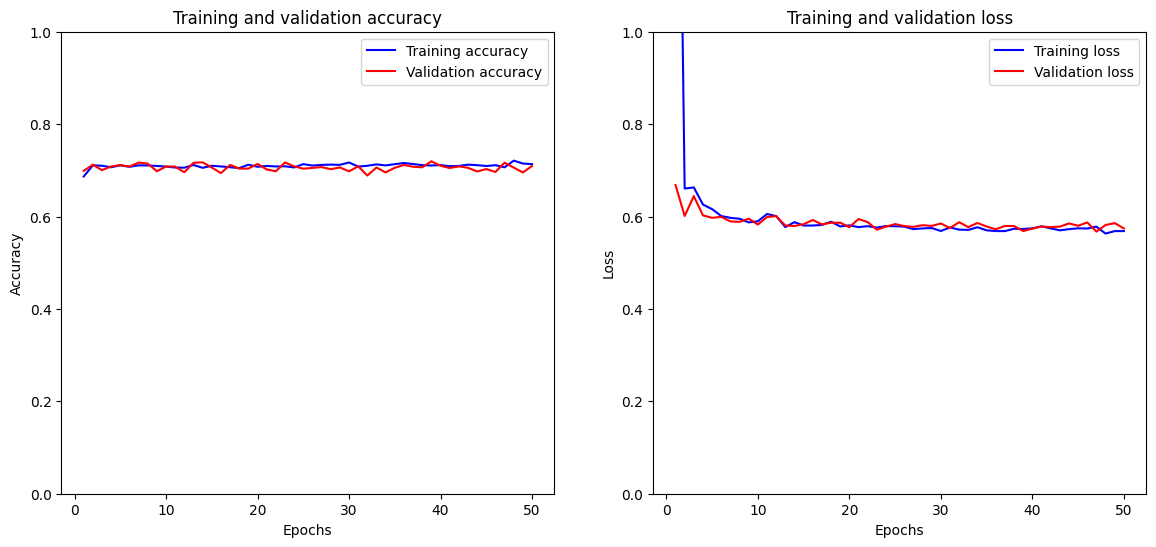

In [ ]:
plot_training_history(history_seg_net[0])

# DeepLab

**Preprocessament**

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar el CSV amb les anotacions
csv_path = '/content/drive/MyDrive/TFG/bathroom-obj-seg/train-dataset/_annotations.csv'
annotations = pd.read_csv(csv_path)

# Crear un mapatge de les classes a índexs
class_names = annotations['class'].unique()
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

# Funció per carregar les imatges en format RGB i redimensionar-les
def load_image(image_path, size=(256, 256)):
    img = Image.open(image_path).convert("RGB")
    img = img.resize(size, Image.LANCZOS)
    return img

# Funció per carregar les anotacions i convertir-les en màscares
def load_masks_from_csv(annotations, images_path, num_classes, size=(256, 256)):
    masks = []
    for img_file in sorted(os.listdir(images_path)):
        mask = np.zeros((size[0], size[1]), dtype=np.uint8)
        img_annotations = annotations[annotations['filename'] == img_file]
        for _, row in img_annotations.iterrows():
            xmin = int(row['xmin'] * size[1] / row['width'])
            ymin = int(row['ymin'] * size[0] / row['height'])
            xmax = int(row['xmax'] * size[1] / row['width'])
            ymax = int(row['ymax'] * size[0] / row['height'])
            class_idx = class_to_idx[row['class']]
            mask[ymin:ymax, xmin:xmax] = class_idx
        masks.append(mask)
    return np.array(masks)

# Definir el camí de les imatges
IMATGES_PATH = '/content/drive/MyDrive/TFG/bathroom-obj-seg/train-dataset/images/'

# Càrrega de les imatges i les màscares des del CSV
images = np.array([np.array(load_image(os.path.join(IMATGES_PATH, img_file))) for img_file in sorted(os.listdir(IMATGES_PATH))])
masks = load_masks_from_csv(annotations, IMATGES_PATH, len(class_names))

# Divisió de les dades en conjunt d'entrenament i validació
x_train, x_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

# Definir un Dataset de PyTorch
class SegmentationDataset(Dataset):
    def __init__(self, images, masks, transform=None):
        self.images = images
        self.masks = masks
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        mask = self.masks[idx]
        if self.transform:
            image = self.transform(image)
            mask = torch.from_numpy(mask).long()
        return image, mask

# Transformacions per a les dades
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Crear datasets i dataloaders
train_dataset = SegmentationDataset(x_train, y_train, transform=transform)
val_dataset = SegmentationDataset(x_val, y_val, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

**Model**

In [ ]:
# Definir el model DeepLabV3
num_classes = len(class_names)
deep_lab = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
deep_lab.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=(1, 1))
deep_lab = deep_lab.cuda()

print(deep_lab)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

**Train**

In [ ]:
# Funció de pèrdua i optimitzador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(deep_lab.parameters(), lr=1e-4)

# Funció per calcular la IoU
def calculate_iou(pred, target, num_classes):
    iou_list = []
    pred = pred.view(-1)
    target = target.view(-1)

    for cls in range(num_classes):
        pred_inds = pred == cls
        target_inds = target == cls
        intersection = (pred_inds[target_inds]).long().sum().item()
        union = pred_inds.long().sum().item() + target_inds.long().sum().item() - intersection
        if union == 0:
            iou_list.append(float('nan'))  # If there is no ground truth, do not include in evaluation
        else:
            iou_list.append(intersection / union)
    return np.nanmean(iou_list)

# Funció d'entrenament
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50):
    train_losses = []
    val_losses = []
    train_ious = []
    val_ious = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_iou = 0.0
        for images, masks in train_loader:
            images = images.cuda()
            masks = masks.cuda()
            optimizer.zero_grad()
            outputs = model(images)['out']
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)

            preds = torch.argmax(outputs, dim=1)
            train_iou += calculate_iou(preds, masks, num_classes) * images.size(0)

        val_loss = 0.0
        val_iou = 0.0
        model.eval()
        with torch.no_grad():
            for images, masks in val_loader:
                images = images.cuda()
                masks = masks.cuda()
                outputs = model(images)['out']
                loss = criterion(outputs, masks)
                val_loss += loss.item() * images.size(0)

                preds = torch.argmax(outputs, dim=1)
                val_iou += calculate_iou(preds, masks, num_classes) * images.size(0)

        train_loss /= len(train_loader.dataset)
        val_loss /= len(val_loader.dataset)
        train_iou /= len(train_loader.dataset)
        val_iou /= len(val_loader.dataset)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_ious.append(train_iou)
        val_ious.append(val_iou)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train IoU: {train_iou:.4f}, Val IoU: {val_iou:.4f}')

    return train_losses, val_losses, train_ious, val_ious


In [ ]:
 # Entrenament del model

print(f'Training the model DeepLab')
with tf.device('/GPU:0'):
    train_losses, val_losses, train_ious, val_ious = train_model(deep_lab, train_loader, val_loader, criterion, optimizer, num_epochs=50)

    # Save the model manually
    model_path = f'/content/drive/MyDrive/TFG/bathroom-obj-seg/models/deep-lab_plain.pth'
    torch.save(deep_lab.state_dict(), model_path)

    # Store the history and model path in the dictionary
    history_deep_lab = [train_losses, val_losses, train_ious, val_ious, model_path]

Training the model DeepLab
Epoch 1/50, Train Loss: 1.3988, Val Loss: 1.2739, Train IoU: 0.2048, Val IoU: 0.2223
Epoch 2/50, Train Loss: 1.0140, Val Loss: 1.1938, Train IoU: 0.3454, Val IoU: 0.2669
Epoch 3/50, Train Loss: 0.7432, Val Loss: 1.2710, Train IoU: 0.4833, Val IoU: 0.2894
Epoch 4/50, Train Loss: 0.5911, Val Loss: 1.1892, Train IoU: 0.5769, Val IoU: 0.3377
Epoch 5/50, Train Loss: 0.4889, Val Loss: 1.0449, Train IoU: 0.6473, Val IoU: 0.3538
Epoch 6/50, Train Loss: 0.4118, Val Loss: 1.0650, Train IoU: 0.7053, Val IoU: 0.3306
Epoch 7/50, Train Loss: 0.4052, Val Loss: 1.0112, Train IoU: 0.7205, Val IoU: 0.3568
Epoch 8/50, Train Loss: 0.3550, Val Loss: 1.0186, Train IoU: 0.7448, Val IoU: 0.3382
Epoch 9/50, Train Loss: 0.2992, Val Loss: 1.0663, Train IoU: 0.7804, Val IoU: 0.3339
Epoch 10/50, Train Loss: 0.2615, Val Loss: 1.0977, Train IoU: 0.7975, Val IoU: 0.3389
Epoch 11/50, Train Loss: 0.2615, Val Loss: 1.0730, Train IoU: 0.8145, Val IoU: 0.2980
Epoch 12/50, Train Loss: 0.2353, Val

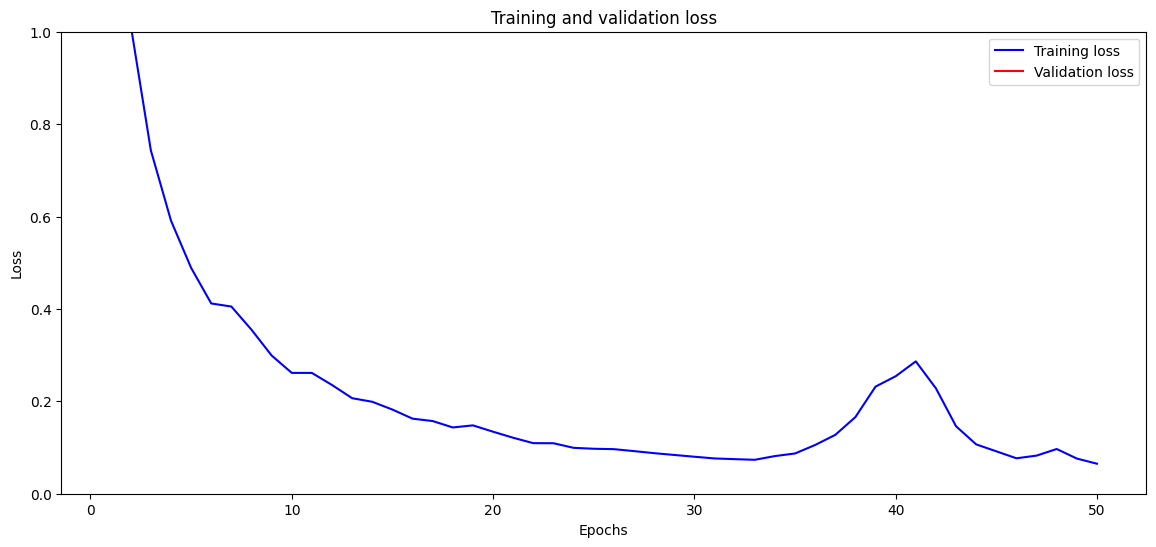

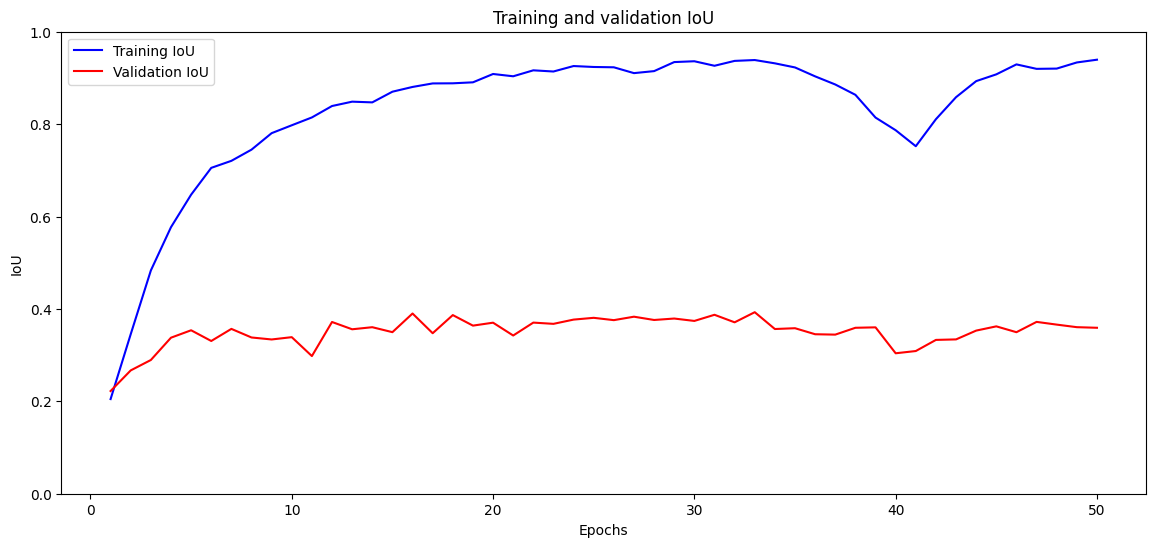

In [ ]:
# Visualització dels resultats de l'entrenament
def plot_training_history(train_losses, val_losses, train_ious, val_ious):
    epochs = range(1, len(train_losses) + 1)

    # Crear gràfic de pèrdua
    plt.figure(figsize=(14, 6))
    plt.plot(epochs, train_losses, 'b', label='Training loss')
    plt.plot(epochs, val_losses, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 1)  # Fixar l'interval de y
    plt.legend()

    # Crear gràfic de IoU
    plt.figure(figsize=(14, 6))
    plt.plot(epochs, train_ious, 'b', label='Training IoU')
    plt.plot(epochs, val_ious, 'r', label='Validation IoU')
    plt.title('Training and validation IoU')
    plt.xlabel('Epochs')
    plt.ylabel('IoU')
    plt.ylim(0, 1)  # Fixar l'interval de y
    plt.legend()

    plt.show()


# Cridar la funció per visualitzar els resultats
plot_training_history(history_deep_lab[0], history_deep_lab[1], history_deep_lab[2], history_deep_lab[3])

# Mask R-CNN

**Preprocessament de dades**

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar el CSV amb les anotacions
csv_path = '/content/drive/MyDrive/TFG/bathroom-obj-seg/train-dataset/_annotations.csv'
annotations = pd.read_csv(csv_path)

# Crear un mapatge de les classes a índexs
class_names = annotations['class'].unique()
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

# Funció per carregar les imatges en format RGB i redimensionar-les
def load_image(image_path, size=(256, 256)):
    img = Image.open(image_path).convert("RGB")
    img = img.resize(size, Image.LANCZOS)
    return img

# Funció per carregar les anotacions i convertir-les en màscares
def load_annotations(annotations, images_path, num_classes, size=(256, 256)):
    data = []
    for idx, img_file in enumerate(sorted(os.listdir(images_path))):
        img_annotations = annotations[annotations['filename'] == img_file]
        boxes = []
        labels = []
        masks = np.zeros((num_classes, size[0], size[1]), dtype=np.uint8)
        for _, row in img_annotations.iterrows():
            xmin = int(row['xmin'] * size[1] / row['width'])
            ymin = int(row['ymin'] * size[0] / row['height'])
            xmax = int(row['xmax'] * size[1] / row['width'])
            ymax = int(row['ymax'] * size[0] / row['height'])
            class_idx = class_to_idx[row['class']]
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(class_idx)
            masks[class_idx, ymin:ymax, xmin:xmax] = 1
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)
        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        iscrowd = torch.zeros((len(boxes),), dtype=torch.int64)
        data.append((img_file, boxes, labels, masks, image_id, area, iscrowd))
    return data

# Definir un Dataset de PyTorch
class SegmentationDataset(Dataset):
    def __init__(self, images_path, annotations, num_classes, size=(256, 256), transform=None):
        self.images_path = images_path
        self.annotations = load_annotations(annotations, images_path, num_classes, size)
        self.transform = transform
        self.size = size

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_file, boxes, labels, masks, image_id, area, iscrowd = self.annotations[idx]
        img_path = os.path.join(self.images_path, img_file)
        image = load_image(img_path, self.size)
        target = {}
        target["boxes"] = boxes


        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd
        if self.transform:
            image = self.transform(image)
        return image, target

# Transformacions per a les dades
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Definir el camí de les imatges
IMATGES_PATH = '/content/drive/MyDrive/TFG/bathroom-obj-seg/train-dataset/images/'

# Nombre de classes en el dataset
num_classes = len(class_names)

# Crear datasets i dataloaders
train_dataset = SegmentationDataset(IMATGES_PATH, annotations, num_classes, transform=transform)
val_dataset = SegmentationDataset(IMATGES_PATH, annotations, num_classes, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))


**Model**

In [ ]:
import torchvision
import torch.nn as nn

# Definir el model Mask R-CNN
mask_rcnn = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
in_features = mask_rcnn.roi_heads.box_predictor.cls_score.in_features
mask_rcnn.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
in_features_mask = mask_rcnn.roi_heads.mask_predictor.conv5_mask.in_channels
hidden_layer = 256
mask_rcnn.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)
mask_rcnn = mask_rcnn.cuda()

print(mask_rcnn)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:00<00:00, 205MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

**Train**

In [ ]:
# Funció de pèrdua i optimitzador
params = [p for p in mask_rcnn.parameters() if p.requires_grad]
optimizer = optim.Adam(params, lr=1e-4)

# Funció d'entrenament
def train_model(model, train_loader, val_loader, optimizer, num_epochs=10):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, targets in train_loader:
            images = list(image.cuda() for image in images)
            targets = [{k: v.cuda() for k, v in t.items()} for t in targets]

            # Depuració: Comprovar les dimensions de les imatges i les màscares
            for img, tgt in zip(images, targets):
                print(f'Image shape: {img.shape}')
                print(f'Boxes shape: {tgt["boxes"].shape}')
                print(f'Labels shape: {tgt["labels"].shape}')
                print(f'Masks shape: {tgt["masks"].shape}')

            optimizer.zero_grad()
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            losses.backward()
            optimizer.step()
            train_loss += losses.item()

        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for images, targets in val_loader:
                images = list(image.cuda() for image in images)
                targets = [{k: v.cuda() for k, v in t.items()} for t in targets]
                loss_dict = model(images, targets)
                losses = sum(loss for loss in loss_dict.values())
                val_loss += losses.item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses

# Funció per calcular la IoU
def calculate_iou(pred, target, num_classes):
    iou_list = []
    pred = pred.view(-1)
    target = target.view(-1)

    for cls in range(num_classes):
        pred_inds = pred == cls
        target_inds = target == cls
        intersection = (pred_inds[target_inds]).long().sum().item()
        union = pred_inds.long().sum().item() + target_inds.long().sum().item() - intersection
        if union == 0:
            iou_list.append(float('nan'))  # If there is no ground truth, do not include in evaluation
        else:
            iou_list.append(intersection / union)
    return np.nanmean(iou_list)

    # Funció per avaluar el model (continuació)
def evaluate_model(model, val_loader, num_classes):
    model.eval()
    ious = []
    with torch.no_grad():
        for images, targets in val_loader:
            images = list(image.cuda() for image in images)
            targets = [{k: v.cuda() for k, v in t.items()} for t in targets]
            outputs = model(images)
            for output, target in zip(outputs, targets):
                pred_masks = output['masks'] > 0.5
                target_masks = target['masks'] > 0.5
                pred_masks = pred_masks.squeeze(1).cpu()
                target_masks = target_masks.cpu()
                iou = calculate_iou(pred_masks, target_masks, num_classes)
                ious.append(iou)
    mean_iou = np.mean(ious)
    print(f'Mean IoU: {mean_iou:.4f}')
    return mean_iou

In [ ]:
 # Entrenament del model

print(f'Training the model Mask R-CNN')
with tf.device('/GPU:0'):
    train_losses, val_losses = train_model(mask_rcnn, train_loader, val_loader, optimizer, num_epochs=20)

    # Save the model manually
    model_path = f'/content/drive/MyDrive/TFG/bathroom-obj-seg/models/mask_rcnn.pth'
    torch.save(mask_rcnn.state_dict(), model_path)

    # Store the history and model path in the dictionary
    history_mask_rcnn = [train_losses, val_losses, model_path]

# Avaluar el model
mean_iou = evaluate_model(mask_rcnn, val_loader, num_classes)

Training the model Mask R-CNN
Image shape: torch.Size([3, 256, 256])
Boxes shape: torch.Size([9, 4])
Labels shape: torch.Size([9])
Masks shape: torch.Size([5, 256, 256])
Image shape: torch.Size([3, 256, 256])
Boxes shape: torch.Size([3, 4])
Labels shape: torch.Size([3])
Masks shape: torch.Size([5, 256, 256])
Image shape: torch.Size([3, 256, 256])
Boxes shape: torch.Size([8, 4])
Labels shape: torch.Size([8])
Masks shape: torch.Size([5, 256, 256])
Image shape: torch.Size([3, 256, 256])
Boxes shape: torch.Size([4, 4])
Labels shape: torch.Size([4])
Masks shape: torch.Size([5, 256, 256])
Image shape: torch.Size([3, 256, 256])
Boxes shape: torch.Size([5, 4])
Labels shape: torch.Size([5])
Masks shape: torch.Size([5, 256, 256])
Image shape: torch.Size([3, 256, 256])
Boxes shape: torch.Size([2, 4])
Labels shape: torch.Size([2])
Masks shape: torch.Size([5, 256, 256])
Image shape: torch.Size([3, 256, 256])
Boxes shape: torch.Size([5, 4])
Labels shape: torch.Size([5])
Masks shape: torch.Size([5, 2

AttributeError: 'list' object has no attribute 'values'

In [ ]:


# Visualització dels resultats de l'entrenament
def plot_training_history(train_losses, val_losses):
    epochs = range(1, len(train_losses) + 1)

    # Crear gràfic de pèrdua
    plt.figure(figsize=(14, 6))
    plt.plot(epochs, train_losses, 'b', label='Training loss')
    plt.plot(epochs, val_losses, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 1)  # Fixar l'interval de y
    plt.legend()

    plt.show()

# Cridar la funció per visualitzar els resultats
plot_training_history(history_mask_rcnn[0], history_mask_rcnn[1])


# Github

In [ ]:
!git clone https://github.com/anyols/Real-State-Investment-IA.git

Cloning into 'Real-State-Investment-IA'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 63.78 KiB | 3.19 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
!cp /content/drive/MyDrive/TFG/yolo-bathroom-obj-seg.ipynb .

In [ ]:
%cd Real-State-Investment-IA

[Errno 2] No such file or directory: 'Real-State-Investment-IA'
/content/Real-State-Investment-IA


In [ ]:
!git config --global user.email "anyols.arnau@gmail.com"
!git config --global user.name "anyols"

In [ ]:
!git add yolo-bathroom-obj-seg.ipynb

In [ ]:
!git pull

In [ ]:
!git commit -m "Training Done"


On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    yolo_bathroom_obj_seg.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git push


fatal: could not read Username for 'https://github.com': No such device or address
